# Sentiment Analysis

Sentiment analysis, or in other words, opinion mining, is a technique used on the data in a text format to determine whether the data is positive, neutral or negative, which is often used by various businesses to gather information about customers needs and opinions about products or brands (MonkeyLearn, 2023).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Data overview, preparation and EDA.

The dataset contains two columns, the first representing the date, and the second headline text, which most likely is newspaper or other news providers such as TV news headlines. 

In [2]:
data = pd.read_csv("abcnews-date-text.csv")

In [3]:
data

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
...,...,...
1244179,20211231,two aged care residents die as state records 2...
1244180,20211231,victoria records 5;919 new cases and seven deaths
1244181,20211231,wa delays adopting new close contact definition
1244182,20211231,western ringtail possums found badly dehydrate...


In [4]:
data.shape

(1244184, 2)

#### Data exploration

The data set contains over 1.2 million news headlines. 
It is worth highlighting that some of the words are misspelt or missing letters.

In [5]:
# data overview looks like there is world news headlines - some of words are misspeled
data["headline_text"][0:10]

0    aba decides against community broadcasting lic...
1       act fire witnesses must be aware of defamation
2       a g calls for infrastructure protection summit
3             air nz staff in aust strike for pay rise
4        air nz strike to affect australian travellers
5                    ambitious olsson wins triple jump
6           antic delighted with record breaking barca
7    aussie qualifier stosur wastes four memphis match
8         aust addresses un security council over iraq
9           australia is locked into war timetable opp
Name: headline_text, dtype: object

In [6]:
data["headline_text"][45]

'epa still trying to recover chemical clean up costs'

#### Word count

The first task of the exploration will be a determination of word count per headline that will provide additional insights in the later stage of the analysis.

In [7]:
data["word_count"] = data["headline_text"].apply(lambda x: len(str(x).split(" ")))

In [8]:
data.head()

,publish_date,headline_text,word_count
0,20030219,aba decides against community broadcasting lic...,6
1,20030219,act fire witnesses must be aware of defamation,8
2,20030219,a g calls for infrastructure protection summit,7
3,20030219,air nz staff in aust strike for pay rise,9
4,20030219,air nz strike to affect australian travellers,7


#### Average number of words, characters ahnd numeric values.

Another useful information could be the number of various characters in the text. That includes special characters, commas, spaces etc., including the average number of words used per headline text or if the text contains numeric values.

In [9]:
data["varchar_count"] = data["headline_text"].str.len() 

In [10]:
# this function will return average number of words per news

In [11]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

In [12]:
# applying the function above as a new column
data["avg_word"] = data["headline_text"].apply(lambda x: avg_word(x))

In [13]:
# does it contain numeric values??

In [14]:
data["num_values"] = data["headline_text"].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data.head()

,publish_date,headline_text,word_count,varchar_count,avg_word,num_values
0,20030219,aba decides against community broadcasting lic...,6,50,7.500000,0
1,20030219,act fire witnesses must be aware of defamation,8,46,4.875000,0
2,20030219,a g calls for infrastructure protection summit,7,46,5.714286,0
3,20030219,air nz staff in aust strike for pay rise,9,40,3.555556,0
4,20030219,air nz strike to affect australian travellers,7,45,5.571429,0


In [15]:
data[data["num_values"] > 0]

,publish_date,headline_text,word_count,varchar_count,avg_word,num_values
10,20030219,australia to contribute 10 million in aid to iraq,9,49,4.555556,1
38,20030219,de villiers to learn fate on march 5,8,36,3.625000,1
42,20030219,dog mauls 18 month old toddler in nsw,8,37,3.750000,1
56,20030219,german court to give verdict on sept 11 accused,9,47,4.333333,1
84,20030219,korean subway fire 314 still missing,6,36,5.166667,1
...,...,...,...,...,...,...
1244170,20211231,record case numbers of covid 19 in nsw and vic...,10,51,4.200000,1
1244171,20211231,record covid 19 numbers in nsw victoria and tas,9,47,4.333333,1
1244173,20211231,sane australia ceos advice on dealing with cov...,9,51,4.777778,1
1244175,20211231,take a look back at the major news stories of ...,11,50,3.636364,1


#### Remove of numeric values

As numeric values are not important in current sentiment analysis, therefore, numbers have been removed from the headlines using the function below to keep the text clean and consistent.

In [16]:
data["headline_text"] = data["headline_text"].apply(lambda x: ''.join((x for x in x if not x.isdigit())))

In [17]:
data["headline_text"][1244180]

'victoria records ; new cases and seven deaths'

#### Stopwords

In order to keep only important information that will provide sentiment values, it is important to remove stop words from the text which provide low-level information. Examples of stop words in the English language are: “the”, “a”, “an”, and “in".

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
# this librirary specifies what language I want to use including collection of words
from nltk.corpus import stopwords
stop = stopwords.words('english')

#### Number of stopwords per textline

For further analysis, the number of stop words could be helpful; therefore stop words column has been created.

In [20]:
data["stopwords"] = data["headline_text"].apply(lambda x: len([x for x in x.split() if x in stop]))


In [21]:
data.head()

,publish_date,headline_text,word_count,varchar_count,avg_word,num_values,stopwords
0,20030219,aba decides against community broadcasting lic...,6,50,7.500000,0,1
1,20030219,act fire witnesses must be aware of defamation,8,46,4.875000,0,2
2,20030219,a g calls for infrastructure protection summit,7,46,5.714286,0,2
3,20030219,air nz staff in aust strike for pay rise,9,40,3.555556,0,2
4,20030219,air nz strike to affect australian travellers,7,45,5.571429,0,1


#### Lower case

As the computer doesn’t understand word meaning and operating is based on ASCII values, it is required to change every word to lowercase (if any).

In [22]:
# all headlines with lower case
data["lower_headline_text"] = data["headline_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

#### Special characters removal

Removing special characters from the text will also remove unnecessary noise from the text, which has been performed by using the regex function below.

In [23]:
data["lower_headline_text"] = data["headline_text"].str.replace('[^\w\s]','')

C:\Users\Admin\AppData\Local\Temp\ipykernel_11452\959651330.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data["lower_headline_text"] = data["headline_text"].str.replace('[^\w\s]','')


#### Stop words removal

And finally, all stop words from the text have been removed.

In [24]:
data["lower_headline_text"] = data["lower_headline_text"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [25]:
print(data["headline_text"].iloc[1]) # original text
print(data["lower_headline_text"].iloc[1]) # text now without stopwords

act fire witnesses must be aware of defamation
act fire witnesses must aware defamation


### Sentiment analysis: Textblob

#### TextBlob: lexicon based sentiment analyser.

TextBlow is a Natural Language Toolkit which is used to analyse text sentiment. The TextBlob outcome provides two values: 

* polarity (which score is between -1 and 1, where 1 identifies the most positive words and -1 the most negative words)
* subjectivity( which score is between 0 and 1, where 0 identifies factual opinion and 1 personal opinion.

This analysis focuses on the polarity score.



In [26]:
from textblob import TextBlob

In [27]:
# first is sentiment value, 2nd objectivenes value
# for ex. 0: negative sentiment / 1.0 value means that there is a very specific thing/objec there is a talk about
# for ex. 1: positive tone (or sentiment) / 0.2 objectivenes or something not exactly specific the conversation is about
# for ex 2: neutral sentiment and neutral topic

data["lower_headline_text"][:1000].apply(lambda x: TextBlob(x).sentiment)

0        (0.0, 0.0)
1      (0.25, 0.25)
2        (0.0, 0.0)
3        (0.0, 0.0)
4        (0.0, 0.0)
           ...     
995      (0.0, 0.0)
996      (0.0, 0.0)
997      (0.0, 0.0)
998      (0.0, 0.0)
999      (0.0, 0.3)
Name: lower_headline_text, Length: 1000, dtype: object

#### TextBlob sentiment score

In [28]:
data["TextBlob_sentiment"] = data["lower_headline_text"].apply(lambda x: TextBlob(x).sentiment[0])

In [29]:
data.head()

,publish_date,headline_text,word_count,varchar_count,avg_word,num_values,stopwords,lower_headline_text,TextBlob_sentiment
0,20030219,aba decides against community broadcasting lic...,6,50,7.500000,0,1,aba decides community broadcasting licence,0.00
1,20030219,act fire witnesses must be aware of defamation,8,46,4.875000,0,2,act fire witnesses must aware defamation,0.25
2,20030219,a g calls for infrastructure protection summit,7,46,5.714286,0,2,g calls infrastructure protection summit,0.00
3,20030219,air nz staff in aust strike for pay rise,9,40,3.555556,0,2,air nz staff aust strike pay rise,0.00
4,20030219,air nz strike to affect australian travellers,7,45,5.571429,0,1,air nz strike affect australian travellers,0.00


#### First look on a sentiment values

Currently, the vast majority of headlines have a neutral sentiment.

In [30]:
# looks like vast majority of headlines are neutral
data["TextBlob_sentiment"].value_counts()

 0.000000    895538
-0.200000     29220
 0.136364     26281
-0.100000     24818
 0.100000     23201
              ...  
 0.073232         1
 0.087121         1
-0.633333         1
-0.134545         1
-0.044697         1
Name: TextBlob_sentiment, Length: 2297, dtype: int64

In [31]:
data['lower_headline_text'][:1000]

0      aba decides community broadcasting licence
1        act fire witnesses must aware defamation
2        g calls infrastructure protection summit
3               air nz staff aust strike pay rise
4      air nz strike affect australian travellers
                          ...                    
995                 conference focus tuna fishery
996                     council hosts farewell mp
997           council resists eba roster pressure
998              customs house restoration opened
999         dam water levels still critically low
Name: lower_headline_text, Length: 1000, dtype: object

#### TextBlob word correction

By using the correct method, text with spelling mistakes will be corrected. As the usage of the method takes a long time, it has been performed on the first 1000 headlines to explore if any significant difference in terms of sentiment score will happen.    

In [32]:
data["text_corrected"] = data['lower_headline_text'][:1000].apply(lambda x: str(TextBlob(x).correct()))

Based on the scores below, the sentiment of the headlines did not change in most cases. 


In [33]:
data["text_corrected"][:1000].apply(lambda x: TextBlob(x).sentiment)

0        (0.0, 0.0)
1      (0.25, 0.25)
2        (0.0, 0.0)
3        (0.0, 0.0)
4        (0.0, 0.0)
           ...     
995      (0.0, 0.0)
996      (0.0, 0.0)
997      (0.0, 0.0)
998      (0.0, 0.0)
999      (0.0, 0.3)
Name: text_corrected, Length: 1000, dtype: object

In [34]:
data.head(1)

,publish_date,headline_text,word_count,varchar_count,avg_word,num_values,stopwords,lower_headline_text,TextBlob_sentiment,text_corrected
0,20030219,aba decides against community broadcasting lic...,6,50,7.5,0,1,aba decides community broadcasting licence,0.0,ba decides community broadcasting licence


The function below would convert sentiment scores to a more consistent form which is positive, neutral or negative.

In [35]:
def OutcomeAnalysis(i):
    if i > 0:
        return "Positive"
    elif i == 0:
        return "Neutral"
    else:
        return "Negative"

In [36]:
data["Outcome_Analysis"] = data["TextBlob_sentiment"].apply(OutcomeAnalysis )

In [37]:
data["Outcome_Analysis"].value_counts()

Neutral     895538
Positive    197390
Negative    151256
Name: Outcome_Analysis, dtype: int64

As can be seen below, the vast majority of the headlines have neutral sentiments. Further improvement is required.

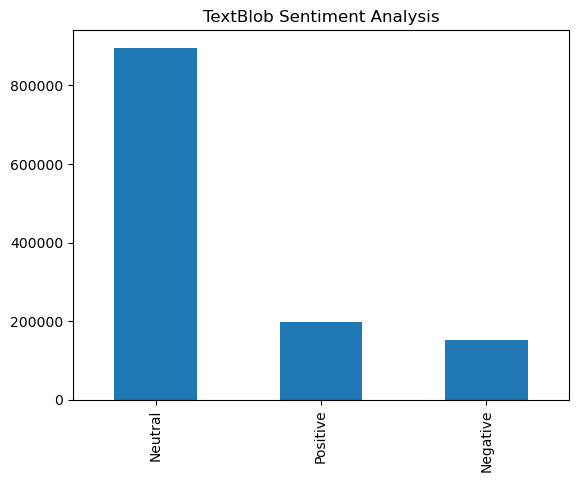

In [38]:
data["Outcome_Analysis"].value_counts().plot(kind='bar',title="TextBlob Sentiment Analysis");

#### Lemmatization

Lemmatization is one of the most common techniques used in sentiment analysis, which changes the words to their root word. Lemmatization is a technique simmilar to the steaming however is more accurate.

In [39]:
data.head(1)

,publish_date,headline_text,word_count,varchar_count,avg_word,num_values,stopwords,lower_headline_text,TextBlob_sentiment,text_corrected,Outcome_Analysis
0,20030219,aba decides against community broadcasting lic...,6,50,7.5,0,1,aba decides community broadcasting licence,0.0,ba decides community broadcasting licence,Neutral


In [40]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
from textblob import Word

In [42]:
data["lemmatized_text"] = data["lower_headline_text"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


In [43]:
data["lemmatized_text"].head()

0    aba decides community broadcasting licence
1        act fire witness must aware defamation
2       g call infrastructure protection summit
3             air nz staff aust strike pay rise
4     air nz strike affect australian traveller
Name: lemmatized_text, dtype: object

#### Porterstemmer

Another text processing technique is stemming. Similar to lemmatization, the stemming technique changes words to their root meaning; however it mainly focuses on suffices like “ing”, “ly”, “s”.

In order to improve TextBlob sentiment outcome, the lemmatized text will now be stemmed using PorterStemmer.


In [44]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data["lemmatized_text"].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                          aba decid commun broadcast licenc
1                               act fire wit must awar defam
2                        g call infrastructur protect summit
3                          air nz staff aust strike pay rise
4                     air nz strike affect australian travel
                                 ...                        
1244179                  two age care resid die state record
1244180                 victoria record new case seven death
1244181             wa delay adopt new close contact definit
1244182    western ringtail possum found badli dehydr hea...
1244183                    make close covid contact new rule
Name: lemmatized_text, Length: 1244184, dtype: object

In [45]:
data["lemma_sentiment"] = data["lemmatized_text"].apply(lambda x: TextBlob(x).sentiment[0])

In [46]:
data["lemma_sentiment"].value_counts()

 0.000000    880474
-0.200000     31723
 0.136364     25180
-0.100000     24886
 0.100000     21323
              ...  
 0.591667         1
 0.384091         1
-0.350694         1
-0.425000         1
-0.044697         1
Name: lemma_sentiment, Length: 2643, dtype: int64

In [47]:
data["Lemma_Outcome_Analysis"] = data["lemma_sentiment"].apply(OutcomeAnalysis )

In [48]:
data["Lemma_Outcome_Analysis"].value_counts()

Neutral     880474
Positive    199707
Negative    164003
Name: Lemma_Outcome_Analysis, dtype: int64

#### TextBlob Sentiment analysis outcome

After using various techniques to estimate sentiment analysis on text headlines, which included stemming lemmatization, removing special characters, and others seems like still the vast majority of the text is neutral and the overall value did not change significantly therefore, further analysis will be performed using other NLP algorithms.

---

## VADER sentiment analysis

Vader, or in other words, Valence Aware Dictionary for sEntiment Reasoning is a model used for analysing text sentiment, which is sensitive to polarity and strength of emotion, by using a human-centric approach.

In [49]:
import nltk

In [50]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [51]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [52]:
SIA = SentimentIntensityAnalyzer()

#### Vader compound scores

At first SIA have been used on headline text where special characters, stop words, and numeric values were removed to explore what will be the outcome of VADERs analysis in comparison with TextBlob and then compound values have been extracted, which is “the sum of the valence score of each word in the lexicon and determines the degree of the sentiment rather than the actual value as opposed to the previous ones”.

In [53]:
data['scores'] = data['lower_headline_text'].apply(lambda x: SIA.polarity_scores(x))


In [54]:
data.head()

,publish_date,headline_text,word_count,varchar_count,avg_word,num_values,stopwords,lower_headline_text,TextBlob_sentiment,text_corrected,Outcome_Analysis,lemmatized_text,lemma_sentiment,Lemma_Outcome_Analysis,scores
0,20030219,aba decides against community broadcasting lic...,6,50,7.500000,0,1,aba decides community broadcasting licence,0.00,ba decides community broadcasting licence,Neutral,aba decides community broadcasting licence,0.00,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,20030219,act fire witnesses must be aware of defamation,8,46,4.875000,0,2,act fire witnesses must aware defamation,0.25,act fire witnesses must aware defamation,Positive,act fire witness must aware defamation,0.25,Positive,"{'neg': 0.324, 'neu': 0.676, 'pos': 0.0, 'comp..."
2,20030219,a g calls for infrastructure protection summit,7,46,5.714286,0,2,g calls infrastructure protection summit,0.00,g calls infrastructure protection summit,Neutral,g call infrastructure protection summit,0.00,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,20030219,air nz staff in aust strike for pay rise,9,40,3.555556,0,2,air nz staff aust strike pay rise,0.00,air no staff must strike pay rise,Neutral,air nz staff aust strike pay rise,0.00,Neutral,"{'neg': 0.367, 'neu': 0.633, 'pos': 0.0, 'comp..."
4,20030219,air nz strike to affect australian travellers,7,45,5.571429,0,1,air nz strike affect australian travellers,0.00,air no strike affect australian travellers,Neutral,air nz strike affect australian traveller,0.00,Neutral,"{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp..."


In [55]:
data['vader_compound'] = data['scores'].apply(lambda x: x['compound'])

In [56]:
data["vader_sentiment"] = data["vader_compound"].apply(OutcomeAnalysis)

#### Vader sentiment

As can be seen below, still the majority of headlines have neutral sentiment, however, overall sentiment value has changed, including positive and negative sentiments.

In [57]:
data["vader_sentiment"].value_counts()

Neutral     559701
Negative    424979
Positive    259504
Name: vader_sentiment, dtype: int64

<AxesSubplot:title={'center':'VADER sentiment analysis'}>

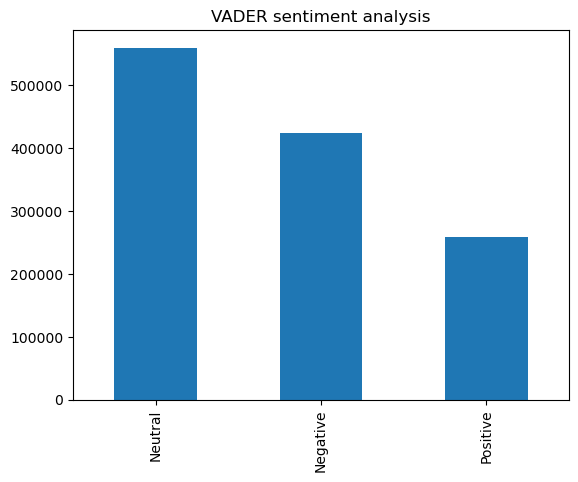

In [58]:
data["vader_sentiment"].value_counts().plot(kind="bar", title="VADER sentiment analysis")

#### Vader + lemmatization + PorterSteemer

Another text has been performed on previously lemmatized and PorterStemmer'ed text to explore if sentiment would change. However as can be seen below, the sentiment has not changed dramatically, therefore, the overall sentiment outcome stays the same.

In [59]:
data["lemma_vader_scores"] = data['lemmatized_text'].apply(lambda x: SIA.polarity_scores(x))

In [60]:
data['vader_compound_lemma'] = data['lemma_vader_scores'].apply(lambda x: x['compound'])

In [61]:
data["vader_sentiment_lemma"] = data["vader_compound_lemma"].apply(OutcomeAnalysis)

In [62]:
data["vader_sentiment_lemma"].value_counts()

Neutral     541219
Negative    430705
Positive    272260
Name: vader_sentiment_lemma, dtype: int64

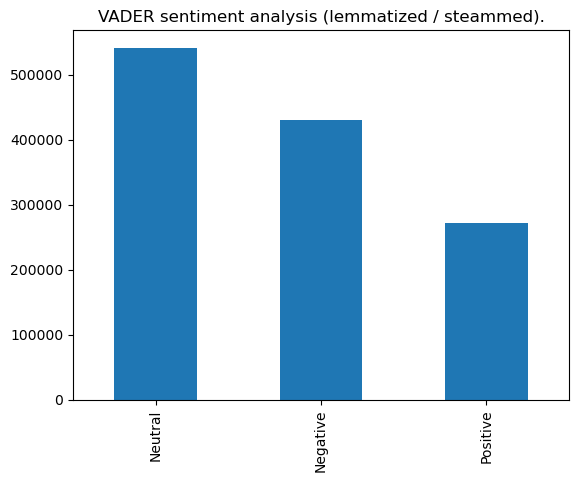

In [63]:
data["vader_sentiment_lemma"].value_counts().plot(kind="bar", title="VADER sentiment analysis (lemmatized / steammed).");

#### Positive or negative sentiment

In the final analysis, the text have been tokenized and then implemented into the Multinomial Naïve Bayes model, using the pipeline to have a better understanding of the text in terms of  Positive or Negative sentiment only  (without Neutral sentiment).

CountVectorizer will change textual data into a numeric one and will also remove any special characters and capital letters from the text including using regex tokenizer.

Multinomial Naive Bayes will be used as a tool for text classification. To achieve this goal, a train/ test split will be required where tokenized text will be as an independent variable and sentiment columns as a dependent variable. As using this method is time-consuming the analysis has been implemented only on the first and last 1000 headlines to deeply clarify VADER analysis.


In [64]:
### tokens

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

In [66]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

ngram 1,1 means it is looking for individual words, not a group of words; therefore 1 word = 1 token

In [67]:

cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)

In [68]:
text_counts = cv.fit_transform(data['lemmatized_text'])

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [69]:
print(text_counts)

  (0, 41)	1
  (0, 20386)	1
  (0, 16513)	1
  (0, 10814)	1
  (0, 46768)	1
  (1, 645)	1
  (1, 89710)	1
  (1, 5242)	1
  (1, 20572)	1
  (2, 30843)	1
  (2, 39537)	1
  (2, 64433)	1
  (2, 78710)	1
  (3, 1590)	1
  (3, 57487)	1
  (3, 77034)	1
  (3, 4934)	1
  (3, 78124)	1
  (3, 60610)	1
  (3, 69202)	1
  (4, 1590)	1
  (4, 57487)	1
  (4, 78124)	1
  (4, 1120)	1
  (4, 4987)	1
  :	:
  (1244180, 66896)	1
  (1244180, 20256)	1
  (1244180, 13253)	1
  (1244180, 56093)	1
  (1244180, 73134)	1
  (1244180, 86693)	1
  (1244181, 87354)	1
  (1244181, 56093)	1
  (1244181, 15599)	1
  (1244181, 20803)	1
  (1244181, 17245)	1
  (1244181, 20659)	1
  (1244181, 932)	1
  (1244182, 88668)	1
  (1244182, 5659)	1
  (1244182, 63254)	1
  (1244182, 35916)	1
  (1244182, 20754)	1
  (1244182, 69127)	1
  (1244183, 56093)	1
  (1244183, 70357)	1
  (1244183, 48966)	1
  (1244183, 15599)	1
  (1244183, 17245)	1
  (1244183, 18241)	1


In [70]:
print(data.iloc[0][7])
print(text_counts[0])

aba decides community broadcasting licence
  (0, 41)	1
  (0, 20386)	1
  (0, 16513)	1
  (0, 10814)	1
  (0, 46768)	1


In [71]:
#Splitting the data into trainig and testing - independent var = text_counts, dependant var = data["sentiment"]
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(text_counts, data["vader_sentiment"], test_size=0.2, random_state=5)

In [72]:
#Training the model

from sklearn.naive_bayes import MultinomialNB


In [73]:
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

MultinomialNB()

Metrics will evaluate the model’s accuracy

In [74]:
from sklearn import metrics

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracy Score: ",accuracy_score)

Accuracy Score:  0.8877297186511652


In [75]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis") # specified what we want to do: sent. nalysis


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In order to use the sentiment pipeline on chosen text lines, the loop below will create a list of headlines from the “lemmatized_text” feature and then will be changed to a data frame format to see the outcomes.

In [76]:
listt = []

for i in data["lemmatized_text"]:
    listt.append(i)     

In [77]:
vector = sentiment_pipeline(listt[:1000])

In [78]:
#vector

In [79]:
vector = pd.DataFrame(vector)

In [80]:
vector["label"].value_counts()

NEGATIVE    635
POSITIVE    365
Name: label, dtype: int64

In [81]:
vector_2 = sentiment_pipeline(listt[::-1][:1000])

In [82]:
vector_2 = pd.DataFrame(vector_2)

In [83]:
vector_2["label"].value_counts()

NEGATIVE    524
POSITIVE    476
Name: label, dtype: int64

#### Multinomial Naïve Baye outcome

The final outcome of the Multinomial Naïve Bayes performed on the samples suggests that the headlines would hold mainly negative sentiment if the neutral sentiment class is declined.

#### Additional text insights

Based on the performed analysis, the outcomes suggest that:

* The headline text is mainly neutral.
* Average word count across all headlines equals ~6.56.
* Average number of various characters equals 4.13, where average word count per line equals 5.56.
* 65440 headlines contain a numeric value.
* By average, all headlines contain at least 1 stop word.
